##Project Name : Movie Rating Prediction

#Executive Summary
Well, who doesn't love movies.  Everyone loves watching movies in free time, movies of their favourite star, director.  Everyone has their own taste in movies. For example, We both love "FORD vs FERRARI", while my one of the all time fav is Shawshank Redemption while his all time fav is, "Good Will Hunting".

If asked to rate the movie, I(Nidish) would rate shawshank redemption the highest while I would rate "Good Will Hunting" bit low cause its not one of my fav movie.  Another factor to look is the genre, each and everyone have their own favorite genre. In real life, not everyone is going to rate a movie and not everyone is going to be very fair when they rate a movie which is not their favourite genre or a actor that they dont like.  Moreover how can we predict a movie rating, that might sounds impossible.  Well, thats where Data Scientist like us come in.  In this Notebook, we will take you along explaining how you can predict the movie rating analysing the dataset, feature engineering, modelling and finally choosing the right model for prediction.  Also, our goal is to choose the best RMSE Score(the lower the better).  Lets get started!

## 1.  Data Pre-Processing :

1.1 Analysing Datasets

The dataset structures and features of each dataset were examined, and the dataset that will be used for prediction was chosen. Links was determined to lack any useful data that could assist with the analysis. Hence, Movies is the dataset selected to contribute to the improvement of predictions.


1.2  Merging Movie and rating:

For the purpose of data pre-processing, the train and test data are merged together, and a left join is performed on movies with ratings. The data itself had no NaN values to begin with, and since a left join was performed, no concern was given to that.

1.3 segrgating Title and Year :

Title of the movie and year comes under the same column.  Hence, with help of regex we split the year and title from each row and added a new column called year.  For movies without year, we imputed it temporarily with '9999'


Similarly, after one-hot encoding on genres, genres was removed from the dataframe.


## 2.  Feature Engineering

2.1 One Hot encoding :
One hot encoding was performed on genre feature to create a binary vectors for all the genre categories.  Since, the genres were separated by '|', we splitted it on '|' and applied one hot encoding on the feature.

2.2 Imputation :
The data itself didn't require a lot of imputation. Movies without years were filtered, years were manually entered into a new csv file and loaded into the dataset and was used to impute the missing years for the movies.

2.3 Feature Elimination :
Since, we have movie_id which corresponds to movie name, it doesn't make any sense to have movie name. Hence, the title was dropped after the year was extracted.

## 3.  Model Testing :

Since, the ratings are continous, four different models were tried and finally the best model was chosen based on best RMSE score on train dataset, and the same model gave us the best result on the Leaderboard for the test dataset.

3.1 Linear Regression :

Linear regression was used to understand and quantify the relationship between various features of a movie features and its rating.

3.2 Ridge Regression :

Ridge regression is a another variation of Linear Regression.  Here Ridge Regression would help us to minimize overfitting and mutli-colinearity between features.

3.3 Random Forest Regressor :

From the outputs from the previous two models, it was learned that bias and variance are two important factors in a dataset that should be considered for better results.  Hence, we tried a bagging algorithm - Random Forest Regressor.

The randomness introduced in selecting the subset of data while running the model will reduce overfitting and gave a more generalized model.

In Simple terms, we can say, subset of data from the dataset was executed parallelly and average mean prediction is taken as the final result.

3.4 Gradient Boosting :

Gradient Boosting is a sequential learner meaning it builds on top of weak learners and corrects the mistakes done in the previous model.  This is a Boosting model which learns from the weak model and higher weightage is given each time for the weak leaner until it improves the model.

In Simple terms, the model is run in a sequential manner again and again, stressing on weak learners.  


We will discuss about each model and their advantage and disadvantage in detail below.

##4.  Final Model Selection :

Based on the below results for RMSE of Train and Leaderboard Test RMSE, Gradient Boosting was chosen the final model for the test dataset.

RMSE Score of Models tested:
1.  Linear Regression :
    1.   Train RMSE : 1.009
    2.   Leaderboard Test RMSE: 99

1.  Ridge Regression :
    1.   Train RMSE : 1.009
    2.   Leaderboard Test RMSE: 99
1.  Random Forest Regression :
    1.   Train RMSE :0.84
    2.   Leaderboard Test RMSE: 87
1.  Gradient Boosting :
    1.   Train RMSE : 0.82
    2.   Leaderboard Test RMSE: 82










#Importing all the required libraries into the notebook.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.interpolate import make_interp_spline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.  Data Pre-Processing

Loading all the datasets provided into dataframes with meaningful name

In [ ]:
# Provided Dataset
links_df = pd.read_csv('/content/drive/MyDrive/links.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/movies.csv')
rating_train_df = pd.read_csv('/content/drive/MyDrive/movie_ratings_train.csv')
rating_test_df = pd.read_csv('/content/drive/MyDrive/movie_ratings_test.csv')

# Created a Dataset for films with missing years.
movie_without_year_df = pd.read_csv('/content/drive/MyDrive/Movie_without_year.csv')

# This is to display all the features in the dataframe.  This will help us in analyzing the dataframe.
pd.set_option('display.max_columns', None)

## 1.1 Analysing Datasets

Before starting with the visulization, its very important to understand how the data is structured.  This will help us in how to handle data based on their dataypes, scheme and also will help us understand if the dataset is truly informative to help us improve the efficiency and prediction.

This can be done with the help of a useful method called 'info' which will print the numbner of rows, non-null values, schema, data type of each feature


In [ ]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
rating_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     90836 non-null  int64  
 1   movieId    90836 non-null  int64  
 2   rating     90836 non-null  float64
 3   timestamp  90836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 MB


In [ ]:
rating_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userId     10000 non-null  int64
 1   movieId    10000 non-null  int64
 2   timestamp  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


After looking at the structure of datasets, Its good that we dont have any null values in any of the datasets. So, we dont have not handle any null values in the features.  On further analysis and keeping our end goal on mind, Links Dataframe doesn't prove to be of any help because all it has is IMBD id and TMBD id.  

We could have used this id's to collect data from free online datasource (API) provided by IMBD and TMBD but it would be out of the scope of the project. Hence we will not be using Links df.

## 1.2 Visulization

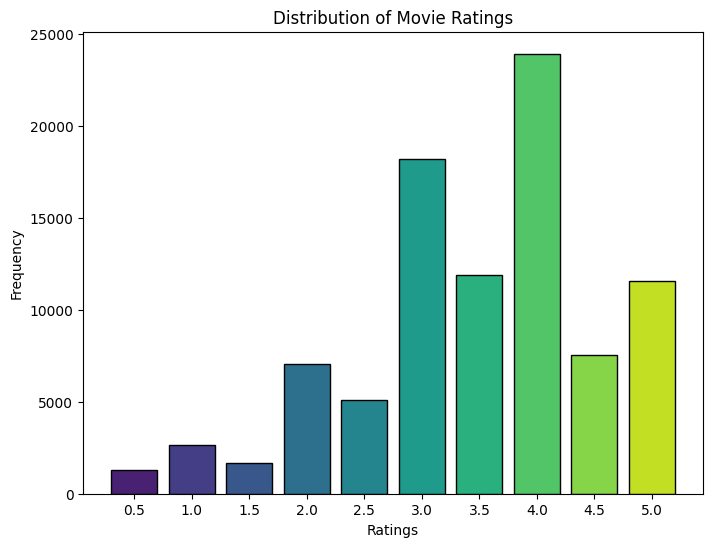

In [ ]:
# obtain unique ratings from the feature
unique_ratings = sorted(rating_train_df['rating'].unique())

# Count the frequency of each rating
rating_counts = rating_train_df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('viridis', len(unique_ratings))
plt.bar(unique_ratings, rating_counts[unique_ratings], color=colors, edgecolor='black', width=0.4)  # Adjust width if needed
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(unique_ratings)


plt.show()

From the above chart, we can see the ratings are not uniformaly distributed across and most of the movies are rated above 3.0, which says its biased towards the higher ratings.

Now, Lets look the the Mean Distribution of Ratings for further insights, from which we would be able to come to a solid reason.

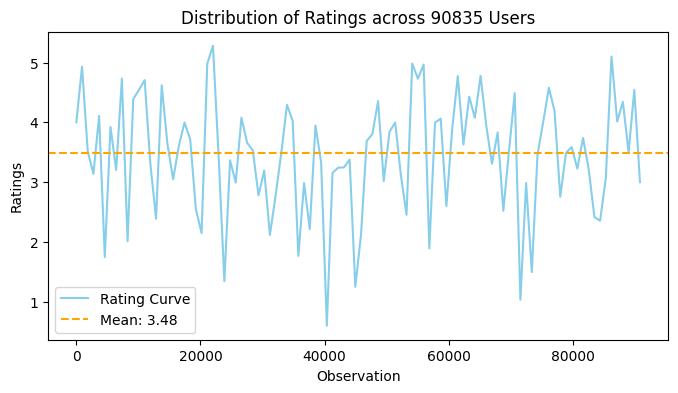

In [ ]:
# Mean Distribution of Rating across 90835 Users

x_smooth = np.linspace(1, len(rating_train_df['rating']), 100)
spl = make_interp_spline(range(1, len(rating_train_df['rating']) + 1), rating_train_df['rating'], k=3)
y_smooth = spl(x_smooth)

plt.figure(figsize=(8, 4))
plt.plot(x_smooth, y_smooth, label='Rating Curve', color='skyblue')

mean_value = np.mean(rating_train_df['rating'])
plt.axhline(y=mean_value, color='orange', linestyle='--', label=f'Mean: {mean_value:.2f}')

plt.title('Distribution of Ratings across 90835 Users')
plt.xlabel('Observation')
plt.ylabel('Ratings')
plt.legend()

plt.show()


# Printing the mean of user ratings
mean_rating = rating_train_df['rating'].mean()
print("Mean of ratings : " + str(round(mean_rating,2)))

 The mean distribution of the ratings is 3.48, which is not the midpoint of where we expect it to be.  

 This is very well reflected in Linear Regression where most of the outputs predicted where near 3.5 or above.


 Right now, in this point, we can say using Ensemble Algorithms would give us better results cause they take subset of data from the dataset and run the model on top of it, which would give us better results.  Since, the mean is at 3.48, a bit towards right not middle, ensemble models using subset of data will diversify the data and decrease bias.

In [ ]:
# Assingning 'rating' feature to y as the response value.

y = rating_train_df['rating']

In [ ]:
# Removing 'rating' from training dataset and concatanating train and test for smooth data pre-processing

del rating_train_df['rating']
rating_df = pd.concat([rating_train_df, rating_test_df], ignore_index=True)

In [ ]:
# Analysing on how many movies each user have reviewed

user_id_count = rating_df['userId'].value_counts()
value_counts_df = pd.DataFrame(user_id_count.reset_index())
value_counts_df.columns = ['Category', 'Count']

User_top_5 = value_counts_df.head(5)
User_top_5

,Category,Count
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346


In [ ]:
User_last_5 = value_counts_df.tail(5)
User_last_5

,Category,Count
605,442,20
606,569,20
607,320,20
608,576,20
609,53,20


<ipython-input-17-c61dec978980>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_top_5['Category'] = User_top_5['Category'].astype(str)
<ipython-input-17-c61dec978980>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_last_5['Category'] = User_last_5['Category'].astype(str)


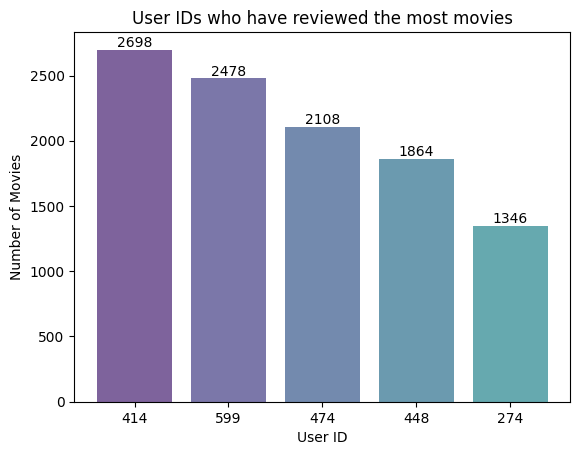

In [ ]:
# Converting category into string to display at the plot

User_top_5['Category'] = User_top_5['Category'].astype(str)
User_last_5['Category'] = User_last_5['Category'].astype(str)

# Plotting top 5 movie reviewers.

bars = plt.bar(User_top_5['Category'], User_top_5['Count'], color=colors, alpha=0.7)
for bar, value in zip(bars, User_top_5['Count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(value)}', ha='center', va='bottom')

plt.xlabel('User ID')
plt.ylabel('Number of Movies')
plt.title('User IDs who have reviewed the most movies')

plt.show()


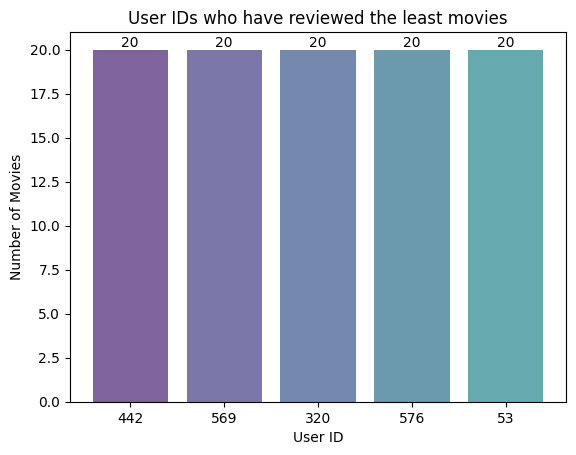

In [ ]:
#Plotting Least 5 movie reviewers

bars = plt.bar(User_last_5['Category'], User_last_5['Count'], color=colors, alpha=0.7)

# Display the values at the top of each bar
for bar, value in zip(bars, User_last_5['Count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(value)}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('User ID')
plt.ylabel('Number of Movies')
plt.title('User IDs who have reviewed the least movies')


# Show the plot
plt.show()

In [ ]:
# Checking for null and discreprencies :

rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100836 non-null  int64
 1   movieId    100836 non-null  int64
 2   timestamp  100836 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


The big difference between users reviewes tell us the user rating is biased and an ensemble model would give us better results compared to other models.

In [ ]:
print("SHAPE AND STRUCTURE OF MOVIES DF : \n")
print(movies_df.shape)
movies_df.head()

SHAPE AND STRUCTURE OF MOVIES DF : 

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print("SHAPE AND STRUCTURE OF RATING DF : \n")
print(rating_df.shape)
rating_df.head()

SHAPE AND STRUCTURE OF RATING DF : 

(100836, 3)


,userId,movieId,timestamp
0,1,1,964982703
1,1,3,964981247
2,1,6,964982224
3,1,47,964983815
4,1,50,964982931


In [ ]:
user_id_count = rating_df['userId'].value_counts()
value_counts_df = pd.DataFrame(user_id_count.reset_index())
value_counts_df.columns = ['Category', 'Count']

value_counts_df.tail()

,Category,Count
605,442,20
606,569,20
607,320,20
608,576,20
609,53,20


To make use of movies df, we will be performing join on rating.  Before that we have to check if all the id's in rating df are present in movie df to check if there are any ID's which are in rating but not in movie.

In [ ]:
# Check if movie ID's in Rating DF are in Movie DF

# Converting movie id's in rating into a list.
movie_id_rating_lst = rating_df['movieId'].tolist()
movies_id_lst = movies_df['movieId'].tolist()


# Empty list to catch all the missing id's in rating
missing_id = []

# For loop to catch the missing id's

for i in movie_id_rating_lst:
  if i not in movies_id_lst:
    missing_id.append(i)

if len(missing_id) == 0:
  print("All the movie ID's in Rating DF are found in Movies DF")
else:
  print("The Missing ID's are : " + missing_id)

All the movie ID's in Rating DF are found in Movies DF


Now that we have confirmed all the ID's are present.  We will move forward to join.  Since rating is the main dataframe and since we are extracting information from the movies df.  We will be performing Left join with movieID as our primary key.

In [ ]:
# Rating DF left joined with Movies DF.

merged_df = pd.merge(rating_df, movies_df, on='movieId', how='left')

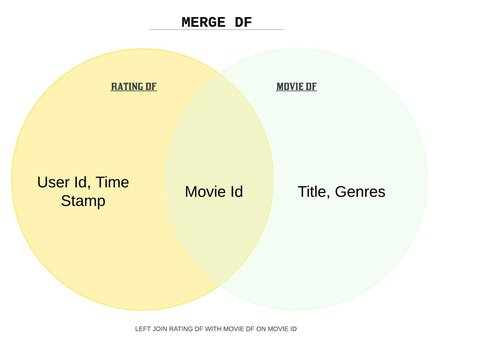

In [ ]:
# Checking if the new merged_df has null values

merged_df.isna().sum()

userId       0
movieId      0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
# Checking if the shape of the Merged_df is maintained

print(merged_df.shape) # row count is maintained.
print(merged_df.head()) # displaying new DF

(100836, 5)
   userId  movieId  timestamp                        title  \
0       1        1  964982703             Toy Story (1995)   
1       1        3  964981247      Grumpier Old Men (1995)   
2       1        6  964982224                  Heat (1995)   
3       1       47  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


# 2.  Feature Engineering

we can add a meaningfull column called year, which will say when the movie was released and will provide a considerable waitage for the model.  Since we have timestamp for when the movie was reviewed.  This would provide a co-relation between when the movie was released and when it was reviewed and rated.

In order to extract the year from the title, we will using regex.

In [ ]:
# Below is a sample test for extracting year from title.

# Regex --> \(\d\d\d\d\)

test = 'Happy Together (a.k.a. Buenos Aires Affair) (Chun gwong cha sit) (1997)'
m = re.search('\(\d\d\d\d\)', test) # Search for string starting with '(' and followed by 4 numerical digits and ending with ')'
result = m.group(0) # Extracted year gets stored in result
test = test.replace(result,'')
result = result.replace('(','').replace(')','')
print(result)
print(test)

1997
Happy Together (a.k.a. Buenos Aires Affair) (Chun gwong cha sit) 


In [ ]:
# Appyling the above logic on the feature title

title_lst = merged_df['title'].tolist() # Converting title into a list

year_lst = [] # Empty list to store the year's
movie_lst = [] # Empty list to store the movie's

film_without_year = [] # Empty list to store the movies without year

for movie in title_lst:
  m = re.search('\(\d\d\d\d\)', movie)
  try:     # Check if the title has a year if yes, store the year in result
    result = m.group(0)
  except AttributeError as e: # if the year is not present in the title, then fill it with dummy year, '9999'
    film_without_year.append(movie) # Append movies without year into the list.
    result = '9999'

  movie = movie.replace(result,'') # After extracting the year, replacing the year with '' in title
  result = result.replace('(','').replace(')','') # Removing paranthesis



  year_lst.append(result)
  movie_lst.append(movie)

print('Title from Merge DF :')
print(title_lst[0:5])
print("\nMovie Names :")
print(movie_lst[0:5])
print("\nYear :")
print(year_lst[0:5])


Title from Merge DF :
['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)', 'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)']

Movie Names :
['Toy Story ', 'Grumpier Old Men ', 'Heat ', 'Seven (a.k.a. Se7en) ', 'Usual Suspects, The ']

Year :
['1995', '1995', '1995', '1995', '1995']


In [ ]:
#Dropping title with year from merged df

del merged_df['title']

In [ ]:
# Inserting  "title" and "year" as separate features in the dataframe.

merged_df.insert(2,'title',movie_lst)
merged_df.insert(3,'year',year_lst)

# Dataframe with new features
merged_df.head()

,userId,movieId,title,year,timestamp,genres
0,1,1,Toy Story,1995,964982703,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,Grumpier Old Men,1995,964981247,Comedy|Romance
2,1,6,Heat,1995,964982224,Action|Crime|Thriller
3,1,47,Seven (a.k.a. Se7en),1995,964983815,Mystery|Thriller
4,1,50,"Usual Suspects, The",1995,964982931,Crime|Mystery|Thriller


Below are the movie "titles", whose corresponding movie released "year" values were missing.

In [ ]:
print("Number of movies without Year : " + str(len(set(film_without_year))) + "\n")
for movie in set(film_without_year):
  print(movie)

Number of movies without Year : 13

Hyena Road
The OA
The Adventures of Sherlock Holmes and Doctor Watson
Paterson
Generation Iron 2
Ready Player One
Nocturnal Animals
Black Mirror
Cosmos
Death Note: Desu nôto (2006–2007)
Moonlight
Maria Bamford: Old Baby
Babylon 5


Since there are only 13 movies without year, release year for the movie was found with the help of Google and were manually typed into a new csv file called Movie_without_year and was converted into a dataframe and then into a dictionary of key value pairs of title : year

In [ ]:
print(movie_without_year_df.shape)
movie_without_year_df.head()

(13, 2)


,Title,Year
0,Moonlight,2016
1,The OA,2016
2,Hyena Road,2015
3,Maria Bamford: Old Baby,2017
4,Black Mirror,2018


In [ ]:
# Creating a dictionary movie and year from movies without year

title_year_dict = dict(zip(movie_without_year_df['Title'], movie_without_year_df['Year']))
title_year_dict

{'Moonlight': 2016,
 'The OA': 2016,
 'Hyena Road': 2015,
 'Maria Bamford: Old Baby': 2017,
 'Black Mirror': 2018,
 'Ready Player One': 2018,
 'Babylon 5': 1994,
 'Paterson': 2016,
 'The Adventures of Sherlock Holmes and Doctor Watson': 1979,
 'Nocturnal Animals': 2016,
 'Death Note: Desu nôto (2006–2007)': 2006,
 'Cosmos': 1980,
 'Generation Iron 2': 2017}

In [ ]:
# Imputing the correct movie release years for the movie without movie years which were previously imputed with dummy year of '9999'

for movie,year in title_year_dict.items():
  merged_df.loc[merged_df['title'] == movie, 'year'] = year

# We believe it can help balance the dataset instead of imputing with random numbers.

In [ ]:
# Checking if all the movies without year were updated.

df = merged_df[merged_df['year'] == '9999']
df.head()

,userId,movieId,title,year,timestamp,genres


**Interesting Find :** For some of the movies, which starts with the word, 'The', the word is appended to the last.  This is an error which was found in title.  Also, there are some series which are not movies in the list.

There is a good reason why we dont have to deal with this.  It will be explained in the upcoming sections.

In [ ]:
# Interesting Find

dummy = set(movie_lst)
n = 0
for i in dummy:
  if 'the' in i.lower():
    print(i)
    n += 1
    if n == 5:
      break


Benchwarmers, The 
Lady from Shanghai, The 
Krays, The 
River Wild, The 
Lord of the Rings, The 


Genre categories for each movie is given under a single feature called 'genres' which are split by '|'. Higher efficiency and prediction can be attained if can split the genre into individual genres and even higher efficiency when these are converted into binary vectors. One-hot encoding can help achieve binary vectors.

Example :

Suppose categorical feature "Color" with three categories: Red, Green, and Blue. Then, One-hot encoding would transform this feature into three binary columns:

Red: [1, 0, 0]
Green: [0, 1, 0]
Blue: [0, 0, 1]
For each data point, only one of these columns will have a value of 1 (indicating the presence of that category), and the others will be 0.

Where only one bit is "hot" (1) and the others are "cold" (0) for each category.  Hence the name One-hot Encoding.

In [ ]:
# Analysing the genre feature for any discrepencies before applying One-Hot Encoding!

genre_lst = merged_df['genres'].tolist()
genre_nest_lst = []
for i in genre_lst:
  result = i.split('|')
  genre_nest_lst.append(result)

In [ ]:
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

In [ ]:
# About Genre Categories

genre_categories = flat(genre_nest_lst)
genre_categories = list(set(genre_categories)) #To Create unique set of list, first we convert list to set and then set back into a list
print("Total Genre Categories : " + str((len(genre_categories))))
print(genre_categories) # Displays the unique list of genres

Total Genre Categories : 20
['Film-Noir', 'Western', 'War', 'IMAX', 'Action', 'Mystery', 'Fantasy', 'Musical', 'Documentary', 'Comedy', 'Thriller', 'Adventure', 'Drama', 'Sci-Fi', 'Horror', '(no genres listed)', 'Romance', 'Children', 'Animation', 'Crime']


In [ ]:
# Categories without genre

filtered_df = merged_df[merged_df['genres'] == '(no genres listed)']
no_genre_films = filtered_df['title'].tolist()
print("Total number of films without any genre : " + str(len(no_genre_films)))
print(filtered_df.head())

Total number of films without any genre : 47
      userId  movieId                                              title  \
3243      21   122896  Pirates of the Caribbean: Dead Men Tell No Tales    
6560      50   114335                                        La cravate    
6614      50   174403                              The Putin Interviews    
8116      62   122896  Pirates of the Caribbean: Dead Men Tell No Tales    
8156      62   172591                  The Godfather Trilogy: 1972-1990    

      year   timestamp              genres  
3243  2017  1452052163  (no genres listed)  
6560  1957  1522446443  (no genres listed)  
6614  2017  1527542476  (no genres listed)  
8116  2017  1523047955  (no genres listed)  
8156  1992  1525637301  (no genres listed)  


Upon analysing, it was confirmed that, movies with no_genres did not have another entry with genres which could have copied into this.  Hence, no_genres are left as it as and will be introduced as a new feature in one-hot encoding.

In [ ]:
# One Hot Encoding

genre_df = merged_df['genres'].str.get_dummies('|')

# Concatenate the original DataFrame with the split DataFrame
merged_df = pd.concat([merged_df, genre_df], axis=1)

In [ ]:
merged_df.head()

,userId,movieId,title,year,timestamp,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,Toy Story,1995,964982703,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,3,Grumpier Old Men,1995,964981247,Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,6,Heat,1995,964982224,Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,47,Seven (a.k.a. Se7en),1995,964983815,Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,50,"Usual Suspects, The",1995,964982931,Crime|Mystery|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


## 2.2. Eliminating Features

The movie id directly corresponds to movie title, hence we can remove the movie title from the dataframe.  The reason for introducing back the title back into the dataframe is because to map the movie name with year for movies without year.  

Since that is done now. we can remove the title feature.

Similary, genres have been encoded into binary vectors as individual feature, hence genres can be dropped as well

In [ ]:
del merged_df['title'] # Deletes 'title from the dataframe
del merged_df['genres'] # Deletes 'genres' from the dataframe

In [ ]:
merged_df.head() # updated dataframe without title and genres

,userId,movieId,year,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,1995,964982703,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,3,1995,964981247,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,6,1995,964982224,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,47,1995,964983815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,50,1995,964982931,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
# Year is only categorical data since it was extracted from a string.  So, converting it into a integer
merged_df['year'] = merged_df['year'].astype(int)

# Checking the schema for uniform datatypes and null values before modelling.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   userId              100836 non-null  int64
 1   movieId             100836 non-null  int64
 2   year                100836 non-null  int64
 3   timestamp           100836 non-null  int64
 4   (no genres listed)  100836 non-null  int64
 5   Action              100836 non-null  int64
 6   Adventure           100836 non-null  int64
 7   Animation           100836 non-null  int64
 8   Children            100836 non-null  int64
 9   Comedy              100836 non-null  int64
 10  Crime               100836 non-null  int64
 11  Documentary         100836 non-null  int64
 12  Drama               100836 non-null  int64
 13  Fantasy             100836 non-null  int64
 14  Film-Noir           100836 non-null  int64
 15  Horror              100836 non-null  int64
 16  IMAX                

In [ ]:
# Splitting back the merged_df into train and test dataset :

rating_train = merged_df.iloc[:90836]
rating_test = merged_df.iloc[90836:]

print("Rating_train_df : " + str(rating_train.shape))
print('Rating_test_df : ' + str(rating_test.shape))

Rating_train_df : (90836, 24)
Rating_test_df : (10000, 24)


In [ ]:
# Displaying Training dataset

rating_train.head()

,userId,movieId,year,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,1995,964982703,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,3,1995,964981247,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,6,1995,964982224,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,47,1995,964983815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,50,1995,964982931,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


# 3.  Model Testing

In [ ]:
# Assigning rating_train to X

X = rating_train

## 3.1. Linear and Ridge Regression

Since we are trying to predict movie ratings here in the range of 0.5 to 5.0 which is continous, we will start our model testing with Linear Regression and then with Ridge Regression.

1.  * Linear regression can help us find the relationship between independent variables(training_set) and depended variable(Y - Target variable).
    * Linear regression is very straight forward and is good starting point for analysis of our model.

2.  * Ridge regression is an upgraded version of Linear Regression.  There is a chance for overfitting in Linear Regression which can be overcomed by Ridge.  A regularization parameter(α) is introduced which will make sure the model doesn't rely heavily on one parameter which can prevent overfitting.

    * The con of ridge regression is, if the regularization parameter(α) is not set properly, then it can affect the model.

Since we are dealing with minimal number of features here.  We will test ridge regression to check if we see any improvements in the model and try to prevent the model from overfitting.

In [ ]:
# Splitting the training dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Regularization Parameter
alpha_value = 1.0

# Train Ridge regression model
model_ridge = Ridge(alpha=alpha_value)
model_ridge.fit(X_train, y_train)

# Predict on Test Set
y_pred = model.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Evaluating RMSE Values
rmse_lr = np.sqrt(mse)
rmse_ridge = np.sqrt(mse_ridge)


print("Root Mean Squared Error (RMSE): " + str(rmse_lr))
print("Root Mean Squared Error (RMSE) - Ridge : " + str(rmse_ridge))
print("\n\n")

Root Mean Squared Error (RMSE): 1.0125585746868642
Root Mean Squared Error (RMSE) - Ridge : 1.0125655778313363





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38401e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
X_test_true = rating_test #Data to be predicted

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Train the Ridge regression model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X, y)

# Make predictions on the testing set
y_pred = model.predict(X_test_true)
y_pred_ridge = model_ridge.predict(X_test_true)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08324e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# Round each value to the nearest 0.5
y_pred = [round(value * 2) / 2 for value in y_pred]

y_pred_ridge = [round(value * 2) / 2 for value in y_pred_ridge]

In [ ]:
print(y_pred) # Linear Regression output

[4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5,

In [ ]:
print(y_pred_ridge) # Ridge Regression output

[4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5,

We dont see any major improvements between the models. Also, our rmse scores aren't that great. We tried with regularization parameter values of [0.5,1.0,10] and the rmse score stayed the same.  

Here are somethings that we can interpret : In the visualization part, we saw that the rating in the training set was not equally distributed.  This could introduce a bias in the model.  This is why in the above predicted code block we see lot of values around 3.5 and 4.  since, the mean of rating in training dataset was 3.8.

Hence, for the same the reason we wont we able to choose this model as our best model.

## Bagging and Boosting


Before testing the next model, its important to understand certain factors when modelling a dataset. Those two factos are Bias and Variance.

We as a team, personally feel, this is one of the important factors which makes a good data scientist.  So, we will be touching upon this topic to understand why we are using the upcoming models in model testing.

**Bias** : Bias is the difference between predicted value and ground truth.

**Variance** : Variance is how close the values are spread to the mean average of the predicted values.

  1.  High variance is not healthy and might cause overfitting,  meaning it can perform well on training dataset and will perform poorly on test dataset.

  2.  Low variance is not good either.  It might fail to capture the complexity of the relationship between data and will cause underfitting

So, in our case, we have to try to achieve moderate variance and reduce the bias as much possible without affecting the model.



### How do we do that?

This is where Bagging and Boosting can help us.  Let us explain :

Bagging and Boosting are both ensemble techniques where a set of weak learners are combined together to obtain a strong model which has better performance than one.  

As learned earlier, Bias and variance are the top reasons for error in the model.  Bagging and Boosting can help in decreasing variance.  To be more specific,

  1.  Bagging reduces variance.
  2.  Boosting reduces bias.


Multiple models is better than single model.  Small subsets of data is taken in multiple iterations from the orginal dataset with replacement.  This is called bootstrapping and this what is what done in Bagging and Boosting Methods.


## 3.2. Random Forest Regressor

Random forest regressor is a bagging method where multiple models run parallely and are independent of each other.  The final predictions are determined by combining all the prediction.


In [ ]:
# Here we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)

# RMSE Values
rmse_rf = np.sqrt(mse_rf)

# Display the Mean Squared Error
print(f'Root Mean Squared Error (MSE): {rmse_rf}')


Root Mean Squared Error (MSE): 0.8473948786180093


In [ ]:
# Train the Random Forest Regressor model
X_actual_test = rating_test

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X,y)

# Make predictions on the testing set
y_pred = rf_model.predict(X_actual_test)

In [ ]:
# Random Forest Regression output

y_pred = [round(value * 2) / 2 for value in y_pred]
print(y_pred)

[4.0, 3.5, 3.5, 5.0, 4.5, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 4.0, 4.0, 4.5, 4.5, 4.5, 4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.5, 4.0, 4.5, 2.5, 3.0, 2.5, 4.5, 3.5, 3.0, 3.5, 4.0, 3.5, 4.5, 3.5, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.0, 3.5, 4.0, 4.5, 3.5, 3.5, 3.0, 3.0, 3.0, 4.0, 3.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.0, 4.0, 3.0, 2.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 3.0, 3.0, 3.5, 3.5, 4.5, 3.5, 4.0, 3.5, 4.0, 4.0, 3.0, 4.5, 3.5, 3.5, 4.0, 3.0, 4.5, 4.0, 3.5, 3.5, 3.0, 4.0, 3.5, 3.0, 3.5, 3.0, 3.5, 3.5, 3.0, 3.5, 3.0, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 3.0, 3.5, 4.5, 3.5, 4.0, 4.0, 3.0, 4.5, 3.0, 2.5, 3.0, 3.0, 4.0, 2.5, 4.5, 4.0, 3.0, 3.0, 3.5, 4.0, 3.5, 3.5, 3.0, 3.0, 4.0, 3.5, 3.0, 3.5, 4.0, 3.5, 4.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, 3.5, 4.0, 3.5, 3.5, 4.5, 4.0, 3.5, 4.0, 3.0, 4.0, 3.5, 3.5, 3.0,

From this model, we were able to decrease the RMSE of the models compared to Linear and Ridge Regression.  This shows that we were able to decrease the variance of the model.  

Also, if we look at the final predicted model, the variance is spread.  

### 3.3.  Gradient Boosting

Its like a child learning to walk. Learning from mistakes when they fall and correct it the next time.

Gradient Boosting, as the name suggests its a boosting ensemble.  Here, the model is run in a sequential manner.  Early learners are given simple model and the errors are given higher weightage when the next model is runned on top of it.

Subsequent models are dependent on the previous model. The overall goal of this model is to solve the errors produced in the previous model.

Gradient Boosting combines the predictions of multiple weak learners.  Once a weak model has been trained, it will analyse and give weightage for the errors in the next weak model.  By doing this multiple times, we can reduce the bias.



In [ ]:
# Here we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=4000, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on Test
y_pred = gb_model.predict(X_test)

# RMSE Values
mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb = np.sqrt(mse_gb)

print(f'Root Mean Squared Error (RMSE): {rmse_gb}')

Root Mean Squared Error (RMSE): 0.8286187861899547


We were able to reduce the Bias drastically compared to Linear regression.  Since the target variable was continous and had a short range, variance was handled and bias is where the model had to be improved.  With the RMSE score of 0.82, we were able to reduce the bias.

So, from this we can say we were able to achieve low bias and moderate variance from Gradient Boosting.

# 4.  Conclusion - Final Model - Graident Boosting


Based on RMSE Score, low bias(based on Leaderboard), moderate variance, run time efficiency we believe Graident Boosting is the best model for this Movie Rating Prediction dataset

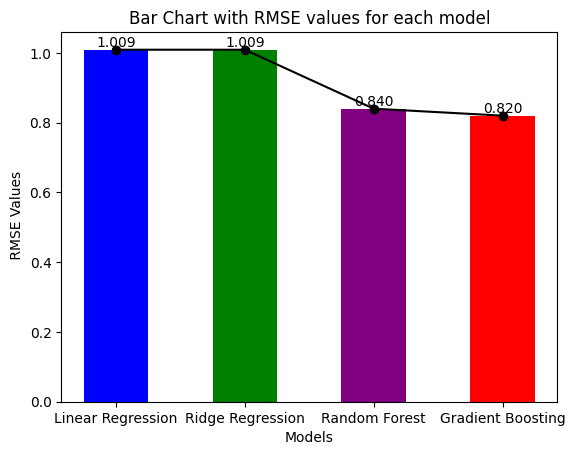

In [ ]:
# Plotting Models based on RMSE Score

categories = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Gradient Boosting']
values = [1.009, 1.009, 0.84, 0.82]

colors = ['blue', 'green', 'purple', 'red']

# Plotting the bar chart
bars = plt.bar(categories, values, color= colors, label='Bar Chart', width = 0.5)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', ha='center', va='bottom')

bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
plt.plot(bar_centers, values, marker='o', linestyle='-', color='black', label='Connecting Line')


plt.xlabel('Models')
plt.ylabel(' RMSE Values')
plt.title('Bar Chart with RMSE values for each model')



plt.show()


In [ ]:
# Using Test data on Gradient Boosting Model.

y_pred = gb_model.predict(rating_test)
y_pred = [round(value * 2) / 2 for value in y_pred]
print(y_pred)

[4.0, 4.5, 4.5, 5.0, 4.5, 4.0, 4.5, 4.5, 4.5, 4.0, 5.0, 4.5, 4.5, 3.5, 3.5, 4.5, 3.0, 4.0, 4.5, 4.5, 3.5, 4.0, 4.5, 4.5, 4.0, 4.5, 3.5, 3.5, 4.0, 4.5, 4.5, 3.5, 4.5, 4.0, 4.0, 3.5, 4.0, 3.5, 3.0, 3.5, 4.0, 4.0, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 3.5, 3.0, 3.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 2.5, 3.5, 2.5, 3.0, 3.5, 3.5, 4.0, 3.0, 3.0, 4.0, 2.5, 4.0, 3.5, 4.0, 3.5, 3.0, 3.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.0, 3.0, 3.5, 3.0, 3.5, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 3.5, 4.0, 3.0, 4.5, 3.5, 2.5, 4.0, 3.5, 3.5, 3.0, 4.0, 3.5, 3.5, 3.5, 4.0, 3.0, 3.5, 3.5, 3.0, 3.0, 4.0, 3.5, 3.5, 3.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.0, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5,

By uploading this on the leader Board, we got a RMSE score of 82 under the submission name, Nidish, Suraj.